In [37]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# path = r'./input/result_40.xlsx'
path = r'./input/result.xlsx'
data = pd.read_excel(path)
data

,Noisiness,ESL,PSL,ASL,ESL-SL,SL-ASL,PSL-SL
0,7.14,56.675,54.324500,63.98500,-3.295,-4.015000,-5.645500
1,6.24,54.500,51.408125,65.34500,-2.840,-8.005000,-5.931875
2,5.64,56.775,55.338875,63.28013,-3.045,-3.460125,-4.481125
3,5.26,56.000,54.996500,64.01250,-3.380,-4.632500,-4.383500
4,5.04,56.500,54.932500,63.44000,-3.160,-3.780000,-4.727500
5,4.69,57.850,55.478875,63.06750,-2.120,-3.097500,-4.491125
6,4.20,57.225,55.537000,63.54500,-2.745,-3.575000,-4.433000
7,4.18,57.625,57.130875,62.23250,-2.055,-2.552500,-2.549125
8,3.89,60.900,57.062750,60.66250,1.720,-1.482500,-2.117250
9,3.67,60.600,58.467750,58.71000,1.920,-0.030000,-0.212250


In [39]:
x_data = np.array(data['Noisiness'])
# y_data = np.array(data['ESL-SL'])
# y_data = np.array(data['SL-ASL'])
y_data = np.array(data['PSL-SL'])

In [40]:
# 定义拟合函数
x0 = 4.18


def piecewise_linear(x, k1, k2, y0):
    return np.piecewise(x,
                        [x <= x0, x > x0],
                        [lambda x: k1 * (x - x0) + y0,
                         lambda x: k2 * (x - x0) + y0])

In [41]:
# 拟合数据
popt, pcov = curve_fit(piecewise_linear, x_data, y_data)

In [42]:
# 输出拟合结果
k1 = popt[0]
k2 = popt[1]
y0 = popt[2]
print('k1 =', k1)
print('k2 =', k2)
print('y0 =', y0)

k1 = -7.32975988730089
k2 = -0.7223330206790315
y0 = -3.815978079137443


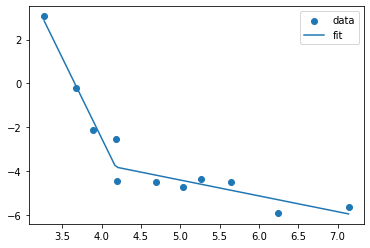

In [43]:
# 绘制拟合结果
x = np.linspace(min(x_data), max(x_data), 100)
plt.scatter(x_data, y_data, label='data')
plt.plot(x, piecewise_linear(x, *popt), label='fit')
plt.legend()
plt.show()

In [44]:
def function(x):
    if x <= x0:
        return k1 * (x - x0) + y0
    else:
        return k2 * (x - x0) + y0

In [45]:
y_pred = np.zeros_like(x_data)
for i in range(len(x_data)):
    y_pred[i] = function(x_data[i])
rss = np.sum((y_data - y_pred) ** 2)
rmse = np.sqrt(mean_squared_error(y_data, y_pred))
r2 = r2_score(y_data, y_pred)

print("RSS = %.2f" % rss)
print("RMSE = %.2f" % rmse)
print("R^2 = %.2f" % r2)

RSS = 3.08
RMSE = 0.53
R^2 = 0.96
